<a href="https://colab.research.google.com/github/LeonardoD99/SwimActivity/blob/main/FDAonSwimData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install scikit-fda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd
from datetime import datetime
from datetime import timedelta
import skfda

from google.colab import drive

In [ ]:
! pip freeze > requirements.txt
! cat requirements.txt


absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.26.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.1.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

directory_path = '/content/drive/My Drive/DatiNuoto/Ready2UseData'

if not os.listdir(directory_path):
    print("Directory is empty")
else:
    print("Directory contains files")
    print(os.listdir(directory_path))

Directory contains files
['Headers.csv', 'HR.csv', 'AvgPace.csv', 'FDAonSwimData.ipynb']


In [ ]:
def convert_time_to_numeric(time_string):
  minutes, seconds = time_string.split(':')
  return int(minutes) * 60 + int(seconds)


# First File

In [ ]:
filename = '/HR.csv'
filepath = directory_path + filename
print(filepath)
df_comp = pd.read_csv(filepath)
df_comp = df_comp.transpose()
df = df_comp.iloc[1:-1]



/content/drive/My Drive/DatiNuoto/Ready2UseData/HR.csv


In [ ]:
data_matrix = df.transpose()
grid_points = np.arange(1,len(df) +1)*18
fData = skfda.FDataGrid(data_matrix, grid_points)

In [ ]:
import skfda.exploratory.visualization as vis

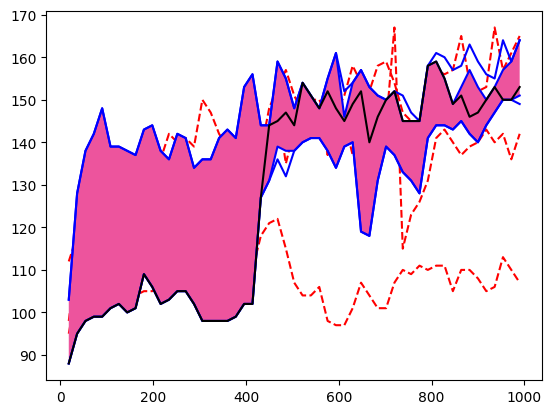

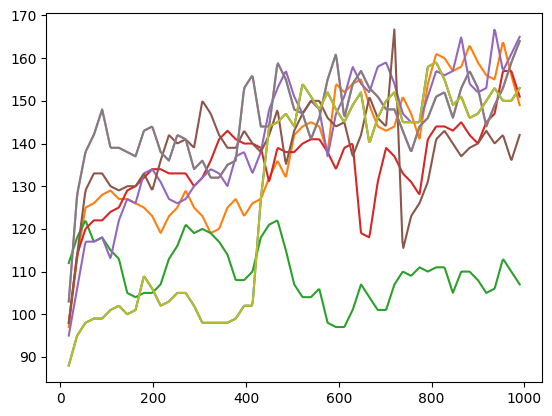

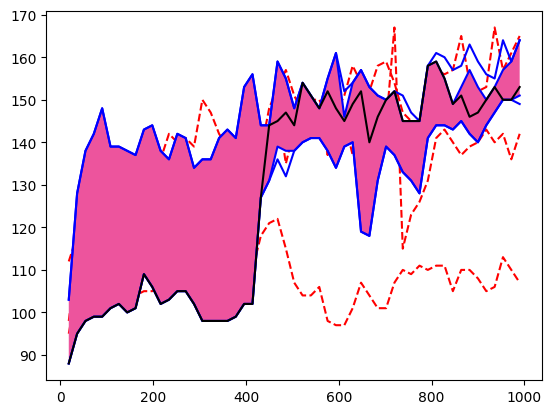

In [ ]:
fData.plot()
fdBoxplot = vis.Boxplot(fData)
fdBoxplot.plot()

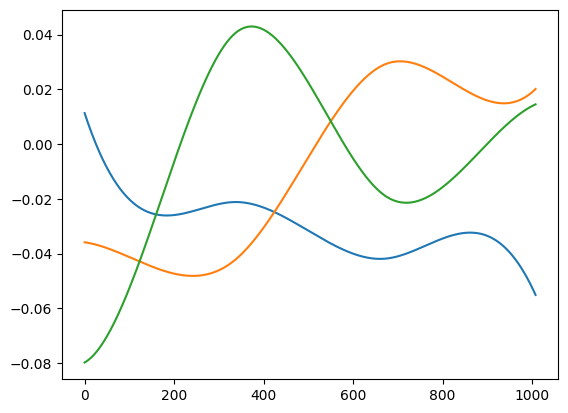

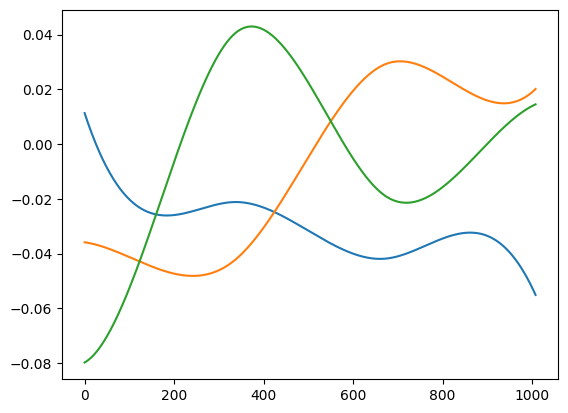

In [ ]:
basis = skfda.representation.basis.BSplineBasis(
    domain_range=(0,1008), n_basis=6
)
basis_fd = fData.to_basis(basis)
fpca_basis = skfda.preprocessing.dim_reduction.FPCA(3)
fpca_basis = fpca_basis.fit(basis_fd)
fpca_basis.components_.plot()

In [ ]:
fpca_basis.components_

FPCA(n_components=3)

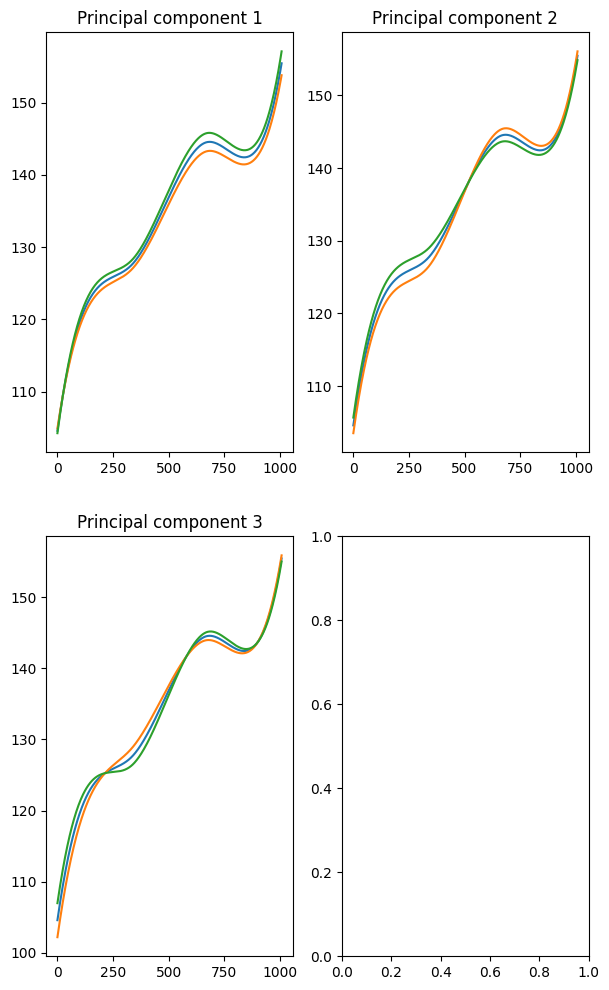

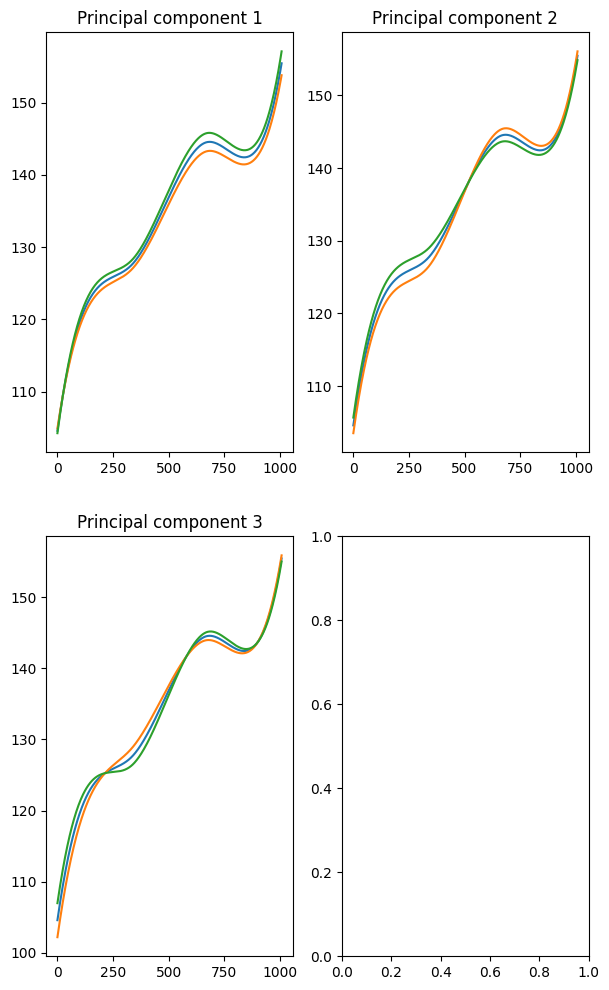

In [ ]:
from skfda.exploratory.visualization import FPCAPlot
FPCAPlot(
    basis_fd.mean(),
    fpca_basis.components_,
    factor=30,
    fig=plt.figure(figsize=(7, 4 * 3)),
    n_rows=2,
).plot()

# Derivative

In [ ]:
skfda.FDataGrid(data_matrix, grid_points)

In [ ]:
from skfda.datasets import fetch_growth
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)